In [24]:
# import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [21]:
# data import
dfWhiteWine = pd.read_csv("winequality-white.csv", sep = ';')
dfRedWine = pd.read_csv("winequality-red.csv", sep = ';')



In [64]:
dfRedWine[dfRedWine['quality'] == 9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [26]:
# data cleaning
#this shows that all data values are not null
dfRedWine[dfRedWine.isnull().any(axis=1)]
dfWhiteWine[dfWhiteWine.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [32]:
# basic analysis
dfRedWineParams = dfRedWine.drop(columns=['quality'])
dfRedWineParamsArray = df.to_numpy()

array([['7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6'],
       ['6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6'],
       ['8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6'],
       ['7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6'],
       ['7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6'],
       ['8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6'],
       ['6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6'],
       ['7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6'],
       ['6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6'],
       ['8.1;0.22;0.43;1.5;0.044;28;129;0.9938;3.22;0.45;11;6']],
      dtype=object)

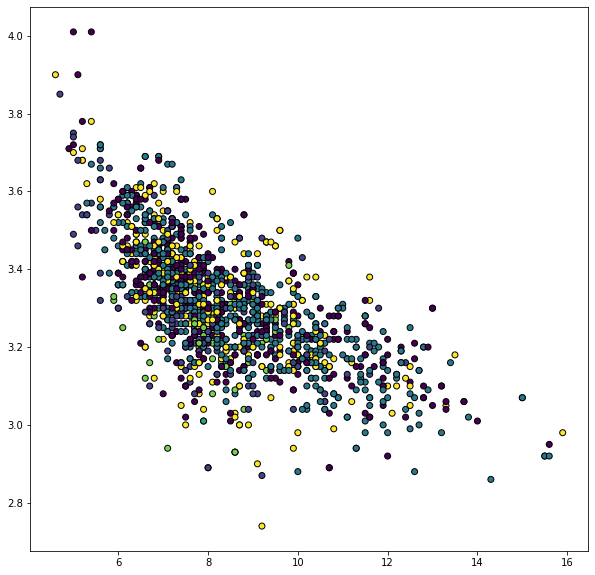

In [70]:
# k means

kmeans = KMeans(n_clusters=6).fit(dfRedWineParams)
labels = kmeans.labels_
fig, ax = plt.subplots(1,1, figsize=(10,10))


ax.scatter(dfRedWineParams['fixed acidity'], dfRedWineParams['pH'], c=labels.astype(np.float), edgecolor='k')


In [75]:
# analysis of results
labels = kmeans.labels_
labels = labels + 3

numCorrect = 0

for index, value in enumerate(labels):
    quality = dfRedWine['quality'].iloc[index]
    if(quality == value):
        numCorrect += 1
        
numCorrect
labels[0:100]

array([3, 8, 8, 8, 3, 3, 8, 5, 5, 4, 8, 4, 8, 5, 7, 7, 4, 8, 5, 8, 8, 8,
       3, 8, 3, 5, 5, 3, 3, 5, 4, 3, 4, 4, 3, 5, 5, 3, 5, 4, 4, 3, 5, 5,
       5, 8, 4, 3, 5, 4, 5, 5, 5, 7, 8, 3, 5, 7, 8, 3, 8, 4, 3, 8, 5, 5,
       3, 5, 8, 5, 5, 4, 4, 3, 4, 3, 3, 3, 4, 7, 5, 8, 8, 3, 8, 3, 7, 3,
       7, 5, 7, 7, 7, 3, 4, 4, 5, 5, 5, 3])

In [69]:
# further steps: normalize and repeat?